x:[-8.48141770e-04  1.03785041e-03  9.99893230e+04]


<IPython.core.display.Javascript object>


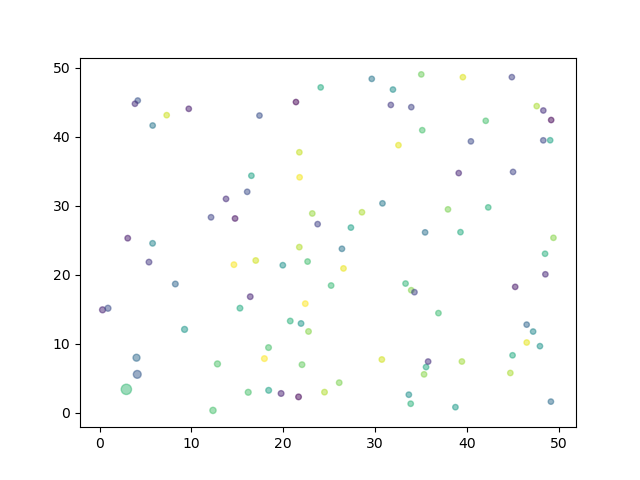

In [7]:
%matplotlib notebook
import random
random.seed()
import matplotlib.pyplot as plt
import numpy as np
from collections import namedtuple
from typing import Union, List
from scipy.optimize import least_squares

Point = namedtuple('Point', 'x y')

source_coordinate = Point(0, 0)
dose_rate_source = 100000  # Gamma*alpha G * cm2 / h

N_points = 100
x_range = 50
y_range = 50

def calc_distance_square(x1, y1, x2, y2) -> float:
    val = (x1-x2)**2 + (y1-y2)**2
    if val == 0:
        val = 10**-4
    return val


def fill_exp_points(x_range, y_range, N_points):
    exp_points = []
    for i in range(N_points):
        x = random.uniform(0, x_range)
        y = random.uniform(0, y_range)
        exp_points.append(Point(x, y))
    return exp_points


def fill_exp_doses(exp_points: List[Point], dose_rate_source, source_coordinate, error=5):
    doses = []
    for point in exp_points:
        distance_square = calc_distance_square(point.x, point.y, source_coordinate.x, source_coordinate.y)
        error = random.uniform(-error, error)
        doses.append(dose_rate_source / distance_square * (1 - error / 100))
    return doses


def show_points_graph(exp_points: List[Point], doses: List[float]):
    x = []
    y = []
    colors = np.random.rand(len(doses))
    areas = []
    max_dose = max(doses)
    min_dose = min(doses)
    min_rad = 15
    max_rad = 55

    for point, dose in zip(exp_points, doses):
        x.append(point.x)
        y.append(point.y)
        areas.append((dose - (min_dose - min_rad)) / ((max_dose - min_dose) / (max_rad - min_rad)) + min_rad)

    plt.scatter(x, y, s=areas, c=colors, alpha=0.5)
    plt.show()

def residuals(x, *args, **kwargs):
    x_s1 = x[0]
    y_s1 = x[1]
    d_s1 = x[2]
    #print(f'Parameters: {x}')
    exp_points = kwargs['exp_points']
    exp_doses = kwargs['exp_doses']
    residuals_array = np.empty(len(exp_points))
    i = 0
    for point, dose in zip(exp_points, exp_doses):
        residuals_array[i] = d_s1/calc_distance_square(point.x, point.y, x_s1, y_s1) - dose
        i += 1
    return residuals_array


exp_points = fill_exp_points(x_range, y_range, N_points)
exp_doses = fill_exp_doses(exp_points, dose_rate_source, source_coordinate)

x0 = (2, -2, 715)
bounds = [(-5, -5, 500), (5, 5, 10**6)]
res = least_squares(fun=residuals, x0=x0, bounds=bounds, kwargs={'exp_points': exp_points, 'exp_doses': exp_doses})

print(f'x:{res.x}')

show_points_graph(exp_points, exp_doses)
